In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the cleaned dataset
data = pd.read_csv("combined_dataset.csv")

# Remove rows containing zero in any of the relevant columns
data = data[(data[['ForeignBornPct', 'ForeignBornNum', 'Median_HH_Inc_ACS', 'NumCivEmployed']] != 0).all(axis=1)]

# Feature selection (new setup)
X = data[['ForeignBornPct', 'ForeignBornNum', 'Median_HH_Inc_ACS']].values  # Independent variables
y = data['NumCivEmployed'].values  # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression - In-sample accuracy: 82.73%
Linear Regression - Test accuracy: 91.46%


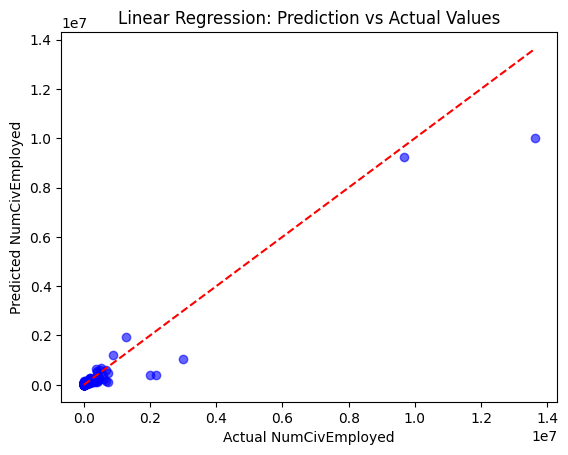

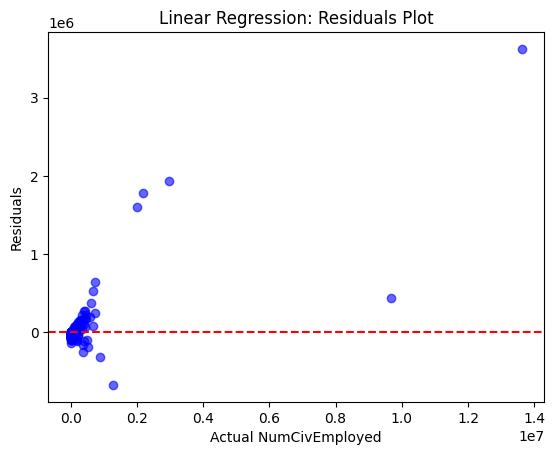

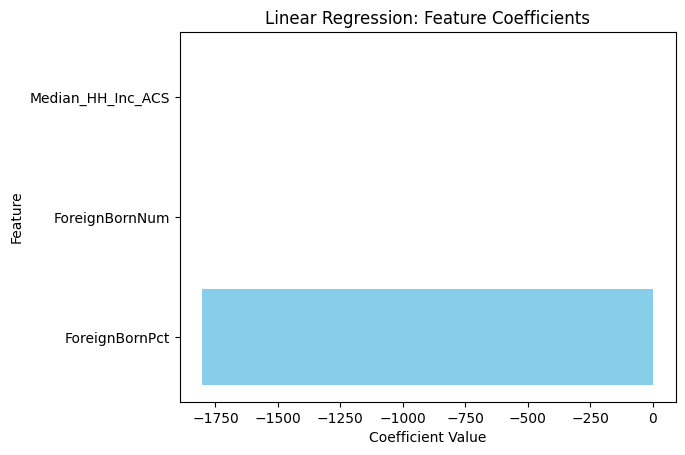

In [13]:
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# In-sample (training) accuracy
y_train_pred_linear = linear_model.predict(X_train)
linear_train_r2 = r2_score(y_train, y_train_pred_linear) * 100  # Convert to percentage

# Test accuracy
linear_test_r2 = r2_score(y_test, y_pred_linear) * 100  # Convert to percentage

# Print results for Linear Regression
print(f"Linear Regression - In-sample accuracy: {linear_train_r2:.2f}%")
print(f"Linear Regression - Test accuracy: {linear_test_r2:.2f}%")

# Visualization 1: Prediction vs. Actual Values (Linear Regression)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Prediction vs Actual Values")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Predicted NumCivEmployed")
plt.show()

# Residuals Plot for Linear Regression
residuals_linear = y_test - y_pred_linear
plt.scatter(y_test, residuals_linear, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Regression: Residuals Plot")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Residuals")
plt.show()

# Feature Coefficients for Linear Regression
coefficients = linear_model.coef_
features = ['ForeignBornPct', 'ForeignBornNum', 'Median_HH_Inc_ACS']
plt.barh(features, coefficients, color='skyblue')
plt.title("Linear Regression: Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

Polynomial Regression - In-sample accuracy: 94.21%
Polynomial Regression - Test accuracy: 96.03%


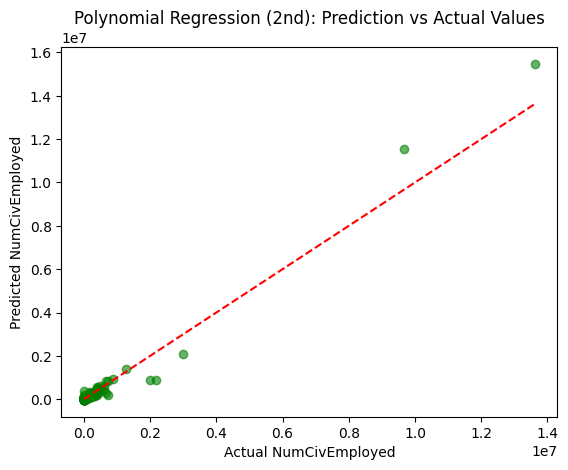

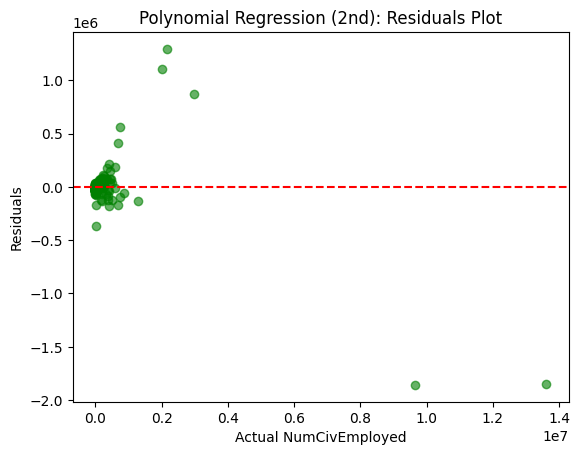

In [14]:
# Model 2: Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# In-sample (training) accuracy
y_train_pred_poly = poly_model.predict(X_poly_train)
poly_train_r2 = r2_score(y_train, y_train_pred_poly) * 100  # Convert to percentage

# Test accuracy
poly_test_r2 = r2_score(y_test, y_pred_poly) * 100  # Convert to percentage

# Print results for Polynomial Regression
print(f"Polynomial Regression - In-sample accuracy: {poly_train_r2:.2f}%")
print(f"Polynomial Regression - Test accuracy: {poly_test_r2:.2f}%")

# Visualization 2: Prediction vs. Actual Values (Polynomial Regression - Degree 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Polynomial Regression (2nd): Prediction vs Actual Values")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Predicted NumCivEmployed")
plt.show()

# Residuals Plot for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.scatter(y_test, residuals_poly, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Polynomial Regression (2nd): Residuals Plot")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Residuals")
plt.show()

Polynomial Regression(3rd) - In-sample accuracy: 98.15%
Polynomial Regression(3rd) - Test accuracy: 96.05%


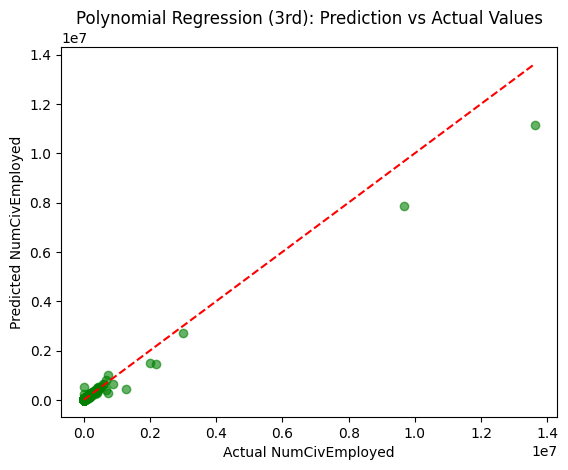

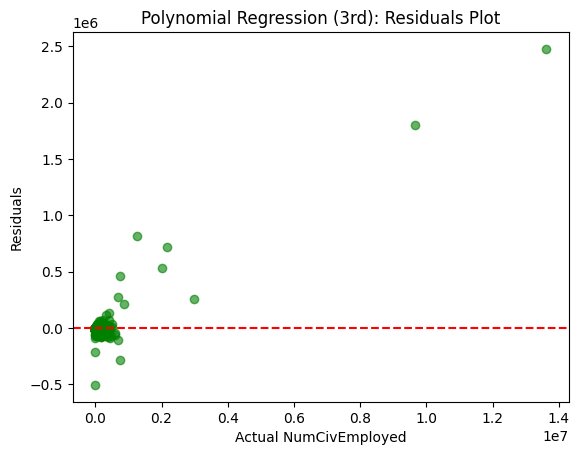

In [16]:
# Model 2: Polynomial Regression (degree=3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# In-sample (training) accuracy
y_train_pred_poly = poly_model.predict(X_poly_train)
poly_train_r2 = r2_score(y_train, y_train_pred_poly) * 100  # Convert to percentage

# Test accuracy
poly_test_r2 = r2_score(y_test, y_pred_poly) * 100  # Convert to percentage

# Print results for Polynomial Regression
print(f"Polynomial Regression(3rd) - In-sample accuracy: {poly_train_r2:.2f}%")
print(f"Polynomial Regression(3rd) - Test accuracy: {poly_test_r2:.2f}%")

# Visualization 2: Prediction vs. Actual Values (Polynomial Regression - Degree 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Polynomial Regression (3rd): Prediction vs Actual Values")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Predicted NumCivEmployed")
plt.show()

# Residuals Plot for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.scatter(y_test, residuals_poly, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Polynomial Regression (3rd): Residuals Plot")
plt.xlabel("Actual NumCivEmployed")
plt.ylabel("Residuals")
plt.show()